### 이상치
- 결측치, 범위에서 벗어나는 데이터, 값이 크게 벗어나는 데이터
- 분석 모델의 성능을 떨어뜨리거나, 결과에 악영향을 미치는 경우가 존재.
- 이상치를 발견하면 확인 후 특정한 값을 대체, 삭제
- IQR 방식
    - matplotlib에서 boxplot의 이상치 결정 방법
    - Q3(3사분위수)와 Q1(1사분위수)를 이용하여 이상치 범위를 지정
    - IQR = Q3-Q1
    - 이상치의 경계는 (Q3 + 1.5*IQR), (Q1-1.5*IQR)
    - 해당 방법 사용시 많은 데이터를 이상치로 판단할 수도 있음.
    - 해서 1.5값을 조절하여 이상치 범위를 변경할 수 있다.

In [46]:
# 사이킷런 설치
# !pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [2]:
# 데이터셋 로드
wine_load = load_wine()

In [3]:
wine_load.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
wine = pd.DataFrame(wine_load['data'], columns = wine_load['feature_names'])
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
wine_load['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
wine['class'] = wine_load['target']

In [7]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

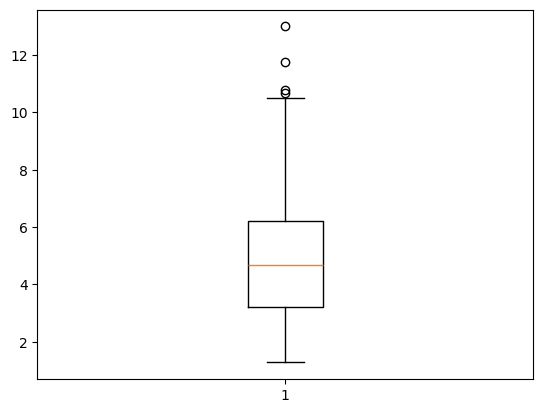

In [8]:
plt.boxplot(wine['color_intensity'])
plt.show()

In [9]:
wine['color_intensity'].describe()

count    178.000000
mean       5.058090
std        2.318286
min        1.280000
25%        3.220000
50%        4.690000
75%        6.200000
max       13.000000
Name: color_intensity, dtype: float64

In [10]:
q_1, q_3 = np.percentile(wine['color_intensity'],[25,75])

In [11]:
print(q_1)
print(q_3)

3.2199999999999998
6.2


In [12]:
iqr = q_3 - q_1
upper_whis = q_3 + (1.5*iqr)
rower_whis = q_1 - (1.5*iqr)
print(f'iqr : {iqr}, upper : {upper_whis}, rower : {rower_whis}')

iqr : 2.9800000000000004, upper : 10.670000000000002, rower : -1.2500000000000009


- iqr을 이용한 이상치 판단 함수 생성
    - 매개변수 3개
        - DataFrame형태의 데이터
        - 기준이 되는 컬럼
        - cnt( 범위 기본값을 1.5 )
    - 기준이 되는 컬럼의 개수만큼 반복 실행
        - 컬럼의 데이터를 기준으로 1사분위수, 3사분위수를 변수에 저장
        - iqr 변수 하나 생성
        - 상단의 경계, 하단의 경계 지정
        - 데이터프레임에서 해당하는 경계를 이용하여 이상치 출력
        - 딕셔너리에 대입 (key값은 컬럼의 이름, value는 데이터프레임)
    - 딕셔너리 데이터를 돌려준다.


In [13]:
def outliers_iqr(_df,*_cols, _cnt=1.5):
    # 빈 딕셔너리 데이터 생성
    result = {}
    # _cols은 데이터의 타입 ? -> tuple
    for col in _cols:
        q_1, q_3 = np.percentile(_df[col],[25, 75])
        iqr = q_3 - q_1
        upper = q_3 + (_cnt*iqr)
        lower = q_1 - (_cnt*iqr)
        print(f'{col}컬럼의 데이터에 상단의 경계는 {upper}이고 하단의 경계는 {lower}이다.')
        
        # 상단 경계와 하단 경계를 이용하여 이상이 데이터 추출
        outlier = _df[( _df[col] > upper ) | (_df[col] < lower)]
        # 딕셔너리에 대입
        result[col] = outlier
    return result

In [14]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [15]:
outliers = outliers_iqr(wine,'color_intensity','proanthocyanins')

color_intensity컬럼의 데이터에 상단의 경계는 10.670000000000002이고 하단의 경계는 -1.2500000000000009이다.
proanthocyanins컬럼의 데이터에 상단의 경계는 3.0이고 하단의 경계는 0.20000000000000018이다.


### 이상치 정제
1. 이상치 제거
    - 데이터의 개수가 매우 많고,
    - 이상치가 존재하는 데이터의 개수가 전체 데이터에 비해 많지 않은 경우 제거
    - 이상치를 제거한다 = 데이터의 개수가 줄어든다.
2. 이상치를 특정 데이터로 대체
    - 이상치의 값을 다른 값으로 대체하는 경우 데이터 분석가에 따라 값들의 차이가 발생

In [16]:
df = wine.copy()

In [17]:
# 이상치를 제거
df.drop(outliers['color_intensity'].index, axis=0, inplace=True)

In [18]:
print(f'원본데이터의 길이 : {len(wine)}')
print(f'이상치가 제거된 데이터 길이 : {len(df)}')

원본데이터의 길이 : 178
이상치가 제거된 데이터 길이 : 174


In [19]:
df2 = wine.copy()

In [20]:
# 이상치 데이터를 특정 데이터로 대체
df2.loc[outliers['color_intensity'].index,'color_intensity'] = df2['color_intensity'].mean()

In [21]:
df2.loc[outliers['color_intensity'].index,'color_intensity']

151    5.05809
158    5.05809
159    5.05809
166    5.05809
Name: color_intensity, dtype: float64

In [22]:
upper_whis = 10.67
lower_whis = -1.25

In [23]:
wine.loc[outliers['color_intensity'].index,'color_intensity']

151    10.80
158    13.00
159    11.75
166    10.68
Name: color_intensity, dtype: float64

In [24]:
for idx in outliers['color_intensity'].index:
    # print(idx)
    data = wine.loc[idx,'color_intensity']
    # print(data)
    if data > upper_whis:
        wine.loc[idx,'color_intensity'] = upper_whis
    elif data < lower_whis:
        wine.loc[idx,'color_intensity'] = lower_whis
    # break

In [25]:
# 대체된 값 확인하기
wine.loc[outliers['color_intensity'].index,'color_intensity']

151    10.67
158    10.67
159    10.67
166    10.67
Name: color_intensity, dtype: float64

### 범주형 변수 처리
- 범주형 변수는 수학적 연산으로 모델을 생성하는 대부분 분석 도구에서 직접적으로 사용이 어렵다.
- 특별한 가공처리가 필요하다.
- 더미변수 사용
- 더미변수는 범주형 변수에 있는 범주들을 각각 컬럼으로 변경 -> 0과 1로 데이터를 대입하여 포함 여부를 보여주는 변수

In [26]:
wine.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [27]:
wine['class'] = wine['class'].map(
    {
        0 : 'class_0',
        1 : 'class_1',
        2 : 'class_2'
    }
)

In [28]:
wine['class'].value_counts()

class
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

In [29]:
# 더미변수 생성
# get_dummies() 함수 이용
wine_dummy = pd.get_dummies(wine, columns=['class'])

In [30]:
wine_dummy['class_class_0'].sum()

np.int64(59)

### 데이터의 분할
- 분석 모델을 학습하고 성과를 확인하기 위해서 데이터를 train 과 test 데이터로 일반적으로 7:3 비율로 나눔.
- 독립 변수와 종속 변수로 분리하는 작업.
- 분석 방법에 따라 train, test로 나누거나 train, validation, test로 나눔
- 비율은 7:3    /    6:2:2

- sklearn 라이브러리에서 train_test_split() 함수를 이용해서 데이터 분할 작업 진행
    - train_test_split(X, Y, test_size = None, random_state = None, shuffle = True, stratify = None)
        - X : 독립 변수 DF 의미
        - Y : 종속 변수 DF 의미
        - test_size : test 데이터의 비율 (0~1)
        - random_state : 임의의 번호를 지정, 같은 숫자를 사용한다면 같은 출력이 생성 
        - shuffle : True라면 섞어준다. 데이터를 추출하기 전에.
        - straify : None이 아닌 경우 데이터는 지정한 변수를 기준으로 계층화되어 해당 변수의 비율을 유지하도록 추출

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [32]:
iris_load = load_iris()

In [33]:
iris_load

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [34]:
iris_load.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [35]:
iris_load.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
iris = pd.DataFrame(iris_load['data'], columns=iris_load['feature_names'])
iris['class'] = iris_load['target']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
iris['class'] = iris['class'].map({
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'
})

In [38]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [39]:
iris['class'].value_counts()

class
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [40]:
x_train, x_test, y_train, y_test = train_test_split(
    iris.drop('class',axis=1),
    iris['class'],
    test_size = 0.3,
    random_state=1000,
    shuffle=False
)

In [41]:
print(f'학습 데이터의 수 : {len(x_train)}, 테스트 데이터의 수 : {len(x_test)}')
print(f'종속 변수 데이터의 수 : {len(y_train)}, 테스트 데이터의 수 : {len(y_test)}')

학습 데이터의 수 : 105, 테스트 데이터의 수 : 45
종속 변수 데이터의 수 : 105, 테스트 데이터의 수 : 45


In [42]:
y_train.value_counts()

class
Setosa        50
Versicolor    50
Virginica      5
Name: count, dtype: int64

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(
    iris.drop('class',axis=1),
    iris['class'],
    test_size = 0.2,
    stratify= iris['class'], # 비율을 똑같이 맞출거다. 계층화,
    random_state = 10
)

In [44]:
Y_train.value_counts()

class
Virginica     40
Versicolor    40
Setosa        40
Name: count, dtype: int64

In [45]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
55,5.7,2.8,4.5,1.3
43,5.0,3.5,1.6,0.6
84,5.4,3.0,4.5,1.5
126,6.2,2.8,4.8,1.8
57,4.9,2.4,3.3,1.0
146,6.3,2.5,5.0,1.9
8,4.4,2.9,1.4,0.2
142,5.8,2.7,5.1,1.9
148,6.2,3.4,5.4,2.3
15,5.7,4.4,1.5,0.4
